In [4]:
import os
# Get the current working directory
os.chdir('E:/Studies/242 - Applications in Data analysis/Project')
os.getcwd()

'E:\\Studies\\242 - Applications in Data analysis\\Project'

In [5]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
sns.set(color_codes=True)
%matplotlib inline


In [6]:
data = pd.read_csv("table.csv", encoding = "ISO-8859-1") ##check this encoding, also encoding = 'unicode_escape'
data = data.drop(columns=['Unnamed: 0','subject_id', 'hadm_id','icustay_id'])
death_time = data["deathtime"]
death_time=death_time.astype('str')
survive_or_not = pd.Series([0 if x == "nan" else 1 for x in death_time], index=death_time.index)
data['survive'] = survive_or_not

In [7]:
data = data.drop(columns=['deathtime', 'ndays' , 'admittime','first_icu_stay','los_icu',] , axis = 1)
data_original = data
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3186 entries, 0 to 3185
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    3186 non-null   object 
 1   age                       3186 non-null   float64
 2   ethnicity                 3186 non-null   object 
 3   los_hospital              3186 non-null   float64
 4   sofa                      3186 non-null   int64  
 5   sapsii                    3186 non-null   int64  
 6   congestive_heart_failure  3186 non-null   int64  
 7   hypertension              3186 non-null   int64  
 8   liver_disease             3186 non-null   int64  
 9   fluid_electrolyte         3186 non-null   int64  
 10  coagulopathy              3186 non-null   int64  
 11  chronic_pulmonary         3186 non-null   int64  
 12  glucose                   3179 non-null   float64
 13  rdw                       3176 non-null   float64
 14  hemoglob

In [8]:
data.describe()

,age,los_hospital,sofa,sapsii,congestive_heart_failure,hypertension,liver_disease,fluid_electrolyte,coagulopathy,chronic_pulmonary,glucose,rdw,hemoglobin,platelet,mcv,ast,alt,survive
count,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3179.000000,3176.000000,3178.000000,3177.000000,3176.000000,2686.000000,2690.000000,3186.000000
mean,52.132091,10.704456,2.900188,20.421218,0.083176,0.044884,0.236974,0.357815,0.196485,0.159761,83.916011,14.076448,9.638829,145.250551,89.424843,68.947506,47.846877,0.117075
std,18.465462,12.076470,3.266992,10.345472,0.276192,0.207082,0.425293,0.479433,0.397402,0.366442,24.456873,1.886098,2.477663,88.419887,7.893287,394.888371,186.774284,0.321560
min,18.070100,-0.387500,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,5.000000,0.000000,4.000000,0.000000,0.000000
25%,42.704150,3.412825,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,12.900000,7.700000,77.000000,85.000000,20.000000,14.000000,0.000000
50%,52.111350,6.779200,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,84.000000,13.600000,9.300000,137.000000,89.000000,31.000000,23.000000,0.000000
75%,62.054525,13.384550,4.000000,26.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,94.000000,14.800000,11.500000,196.000000,94.000000,53.000000,39.000000,0.000000
max,300.352600,161.573600,19.000000,73.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,576.000000,26.800000,17.700000,747.000000,131.000000,11820.000000,6680.000000,1.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'los_hospital'}>,
        <AxesSubplot:title={'center':'sofa'}>,
        <AxesSubplot:title={'center':'sapsii'}>],
       [<AxesSubplot:title={'center':'congestive_heart_failure'}>,
        <AxesSubplot:title={'center':'hypertension'}>,
        <AxesSubplot:title={'center':'liver_disease'}>,
        <AxesSubplot:title={'center':'fluid_electrolyte'}>],
       [<AxesSubplot:title={'center':'coagulopathy'}>,
        <AxesSubplot:title={'center':'chronic_pulmonary'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'rdw'}>],
       [<AxesSubplot:title={'center':'hemoglobin'}>,
        <AxesSubplot:title={'center':'platelet'}>,
        <AxesSubplot:title={'center':'mcv'}>,
        <AxesSubplot:title={'center':'ast'}>],
       [<AxesSubplot:title={'center':'alt'}>,
        <AxesSubplot:title={'center':'survive'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

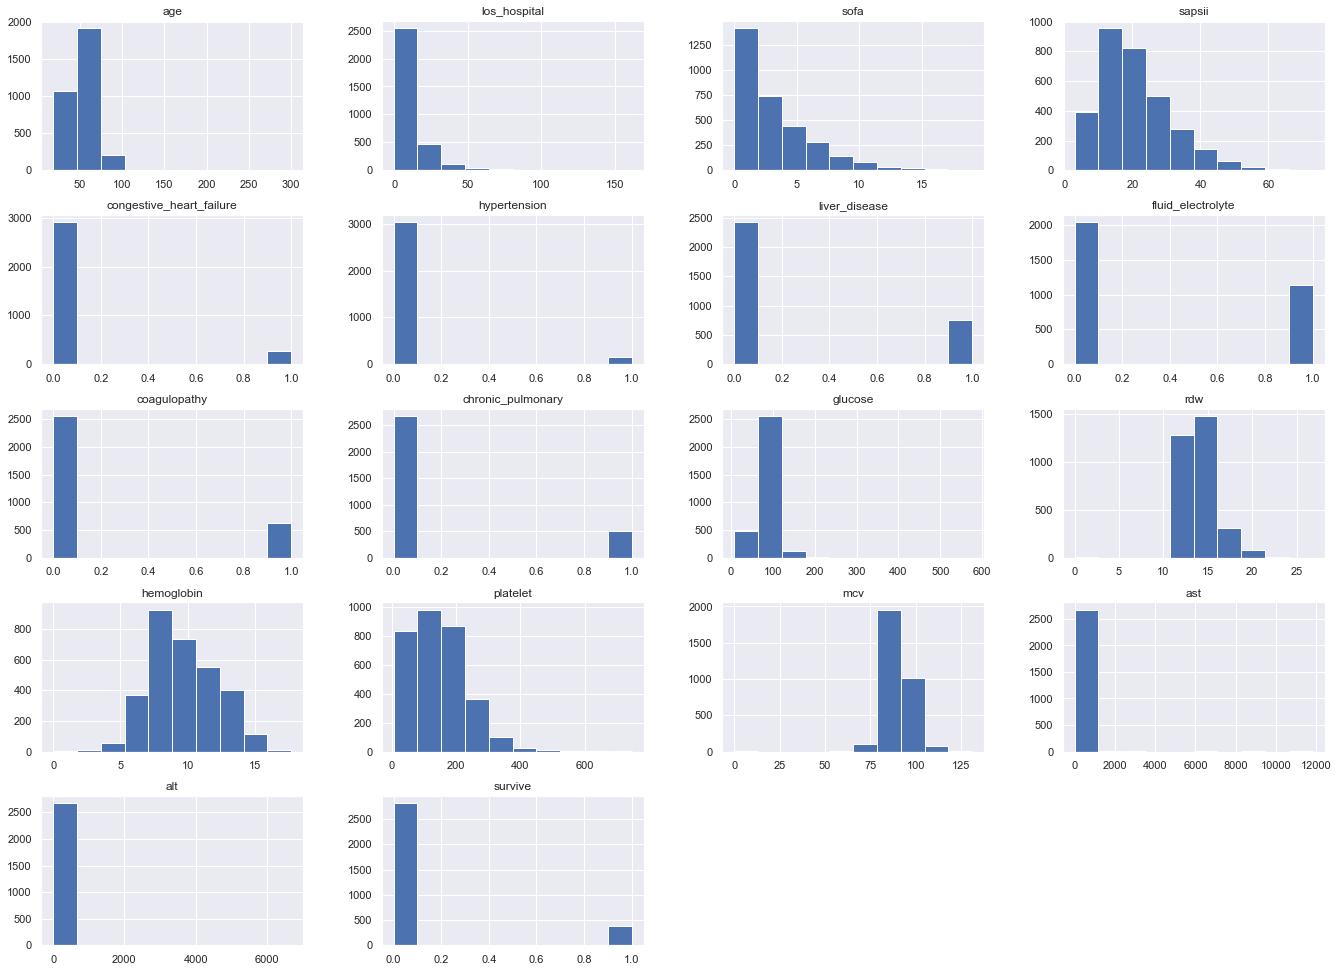

In [9]:
data.hist(bins=10, figsize=(23, 17))

In [10]:
data.skew(axis = 0, skipna = True)

age                          4.426781
los_hospital                 3.285836
sofa                         1.503283
sapsii                       1.014552
congestive_heart_failure     3.020257
hypertension                 4.398287
liver_disease                1.237692
fluid_electrolyte            0.593509
coagulopathy                 1.528459
chronic_pulmonary            1.858150
glucose                      3.552736
rdw                          0.540547
hemoglobin                   0.253428
platelet                     1.107003
mcv                         -2.474601
ast                         22.344878
alt                         22.163091
survive                      2.383170
dtype: float64

In [11]:
percentile_values = [0,0.1,0.2,0.3,0.4,0.5,0.8,0.85,0.9,0.95,1]
Values=[]
def quantiles(column):
    for i in percentile_values:
        Values = column.quantile(i)
        print('Percentile - ', i, 'is', Values)

        
quantiles(data['glucose'])

Percentile -  0 is 8.0
Percentile -  0.1 is 59.0
Percentile -  0.2 is 69.0
Percentile -  0.3 is 75.0
Percentile -  0.4 is 80.0
Percentile -  0.5 is 84.0
Percentile -  0.8 is 97.0
Percentile -  0.85 is 101.0
Percentile -  0.9 is 107.0
Percentile -  0.95 is 118.0
Percentile -  1 is 576.0


In [12]:
def imputes(col):
    p_l = col.quantile(0.01)
    p_u = col.quantile(0.99)
    col.clip(p_l, p_u, inplace=True)

imputes(data['glucose'])
imputes(data['hemoglobin'])
imputes(data['mcv'])
imputes(data['ast'])
imputes(data['alt'])

# Glucose and heme  mcv needs 99% and 1%
# age needs 0 and 95%
# rdw needs 0 and 97.5
# platelet needs 0 and 99%

In [13]:
data['age'].clip(data['age'].quantile(0), data['age'].quantile(0.99), inplace=True)
data['platelet'].clip(data['platelet'].quantile(0), data['platelet'].quantile(0.99), inplace=True)
data['ast'].clip(data['ast'].quantile(0), data['ast'].quantile(0.975), inplace=True)
data['alt'].clip(data['alt'].quantile(0), data['alt'].quantile(0.95), inplace=True)


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sofa'}>,
        <AxesSubplot:title={'center':'sapsii'}>,
        <AxesSubplot:title={'center':'congestive_heart_failure'}>],
       [<AxesSubplot:title={'center':'hypertension'}>,
        <AxesSubplot:title={'center':'liver_disease'}>,
        <AxesSubplot:title={'center':'fluid_electrolyte'}>,
        <AxesSubplot:title={'center':'coagulopathy'}>],
       [<AxesSubplot:title={'center':'chronic_pulmonary'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'rdw'}>,
        <AxesSubplot:title={'center':'hemoglobin'}>],
       [<AxesSubplot:title={'center':'platelet'}>,
        <AxesSubplot:title={'center':'mcv'}>,
        <AxesSubplot:title={'center':'ast'}>,
        <AxesSubplot:title={'center':'alt'}>]], dtype=object)

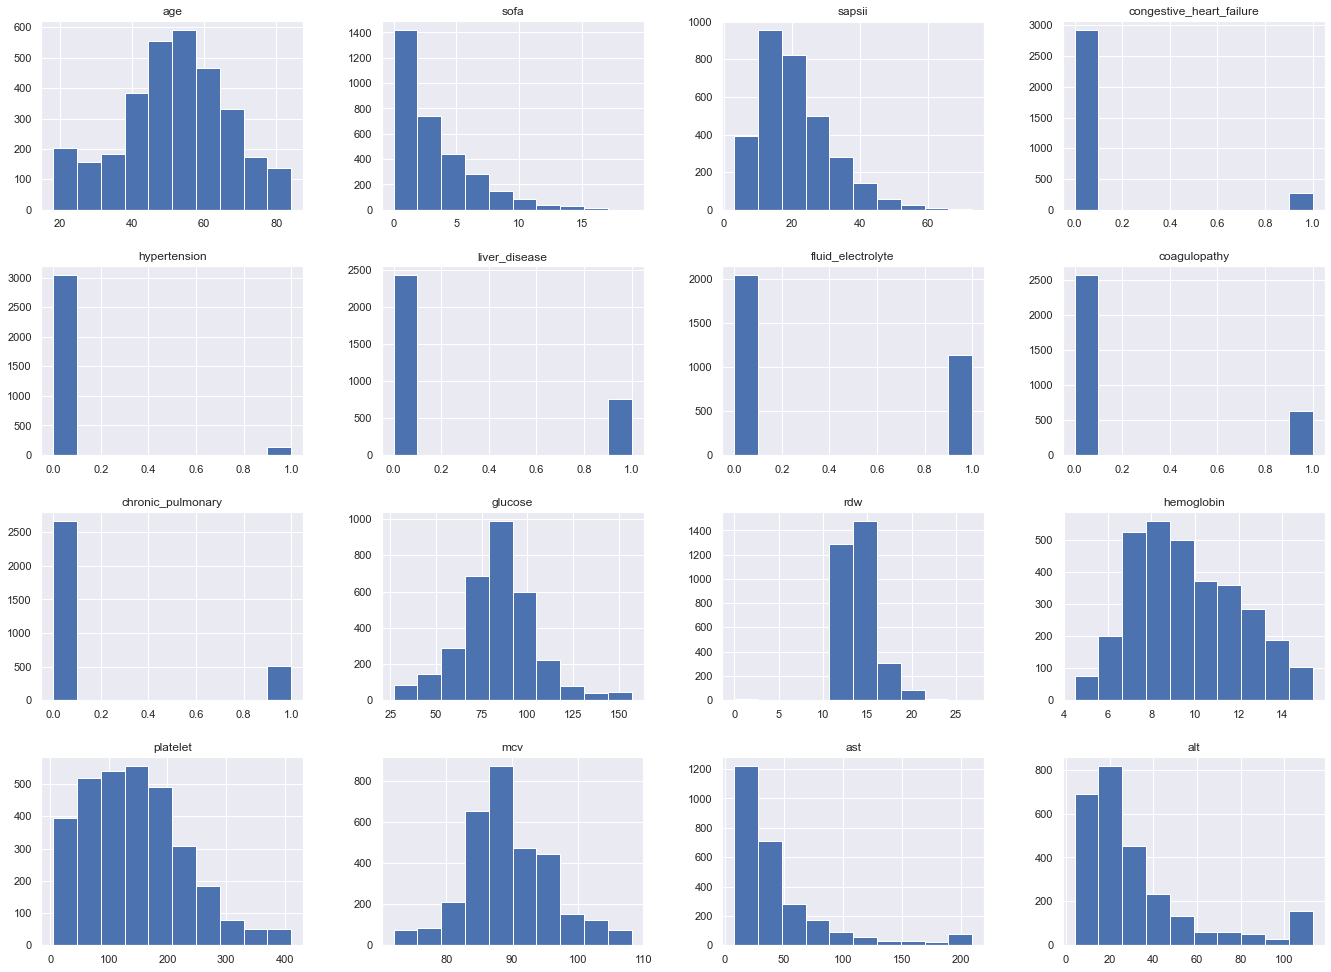

In [14]:
data_plots = data.drop(columns = ['survive','los_hospital'])
data_plots.hist(bins=10, figsize=(23, 17))

array([[<AxesSubplot:title={'center':'survive'}>,
        <AxesSubplot:title={'center':'los_hospital'}>]], dtype=object)

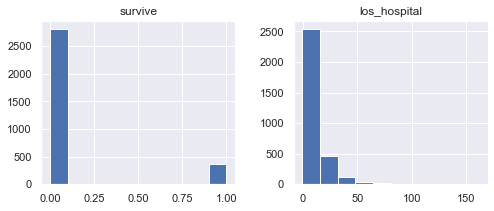

In [15]:
data_plots2 = data[['survive','los_hospital']]
data_plots2.hist(bins=10, figsize=(8,3))

In [16]:
data.skew(axis = 0, skipna = True)

age                        -0.164081
los_hospital                3.285836
sofa                        1.503283
sapsii                      1.014552
congestive_heart_failure    3.020257
hypertension                4.398287
liver_disease               1.237692
fluid_electrolyte           0.593509
coagulopathy                1.528459
chronic_pulmonary           1.858150
glucose                     0.303672
rdw                         0.540547
hemoglobin                  0.308085
platelet                    0.673541
mcv                         0.220206
ast                         2.307020
alt                         1.712592
survive                     2.383170
dtype: float64

<AxesSubplot:>

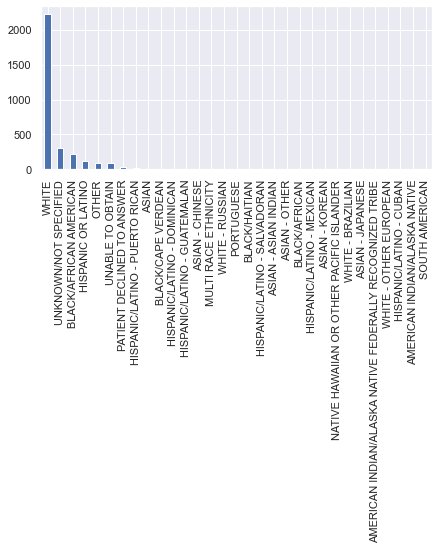

In [17]:
# Plotting a Histogram
data.ethnicity.value_counts().plot(kind='bar',figsize=(7,3))

<AxesSubplot:>

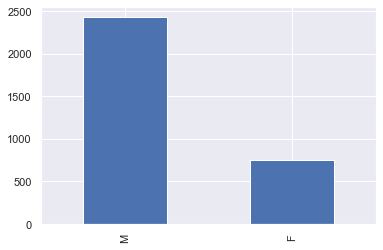

In [18]:
data.gender.value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

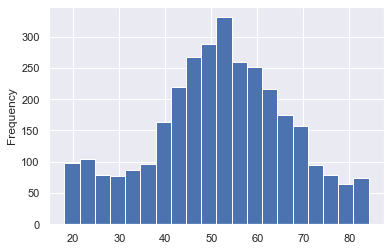

In [19]:
data['age'].plot.hist(bins = 20) 

<AxesSubplot:ylabel='Frequency'>

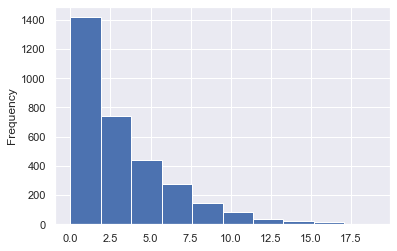

In [20]:
data['sofa'].plot.hist() 

<AxesSubplot:>

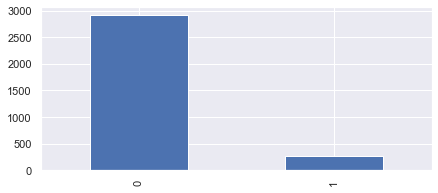

In [21]:
data.congestive_heart_failure.value_counts().plot(kind='bar',figsize=(7,3))

<AxesSubplot:>

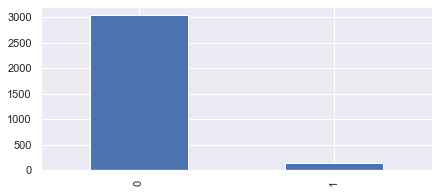

In [22]:
data.hypertension.value_counts().nlargest(40).plot(kind='bar',figsize=(7,3))

<AxesSubplot:>

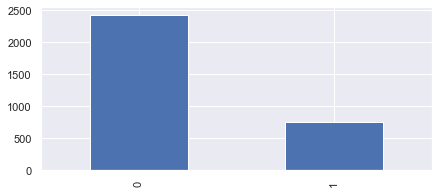

In [23]:
data.liver_disease.value_counts().plot(kind='bar',figsize=(7,3))

<AxesSubplot:>

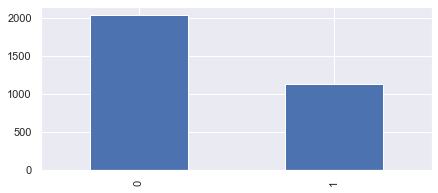

In [24]:
data.fluid_electrolyte.value_counts().nlargest(40).plot(kind='bar',figsize=(7,3))

<AxesSubplot:>

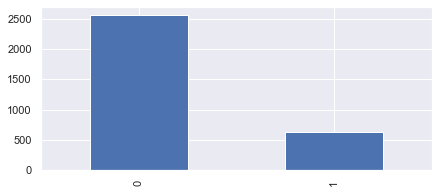

In [25]:
data.coagulopathy.value_counts().nlargest(40).plot(kind='bar',figsize=(7,3))

<AxesSubplot:>

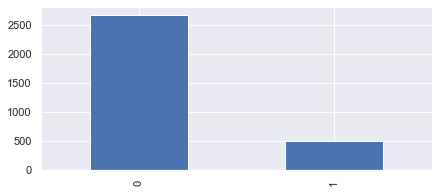

In [26]:
data.chronic_pulmonary.value_counts().nlargest(40).plot(kind='bar',figsize=(7,3))

<AxesSubplot:ylabel='Frequency'>

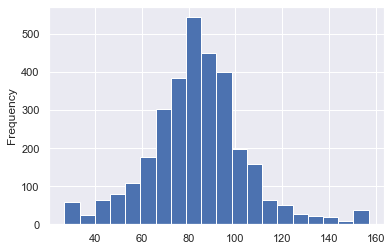

In [27]:
data['glucose'].plot.hist(bins = 20) 

<AxesSubplot:ylabel='Frequency'>

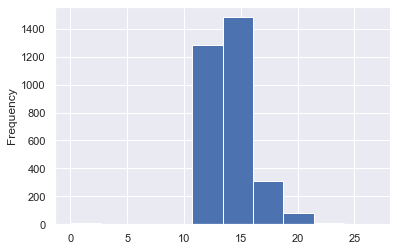

In [28]:
data['rdw'].plot.hist() 

<AxesSubplot:ylabel='Frequency'>

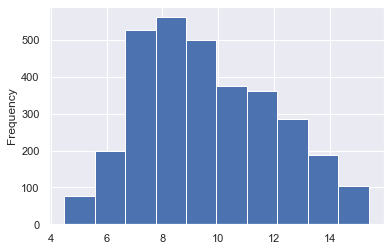

In [29]:
data['hemoglobin'].plot.hist() 

<AxesSubplot:ylabel='Frequency'>

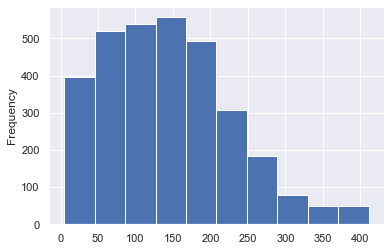

In [30]:
data['platelet'].plot.hist() 

<AxesSubplot:ylabel='Frequency'>

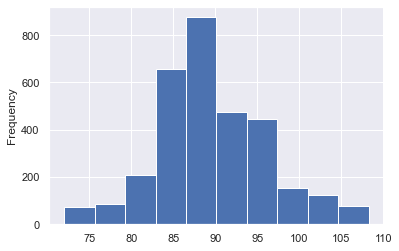

In [31]:
data['mcv'].plot.hist() 

<AxesSubplot:ylabel='Frequency'>

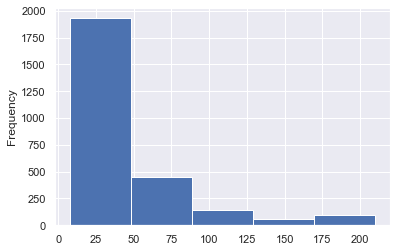

In [32]:
data['ast'].plot.hist(bins = 5) 

<AxesSubplot:ylabel='Frequency'>

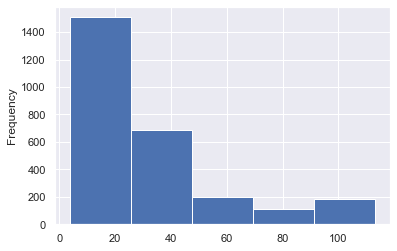

In [33]:
data['alt'].plot.hist(bins = 5) 

#Bivariates

<AxesSubplot:>

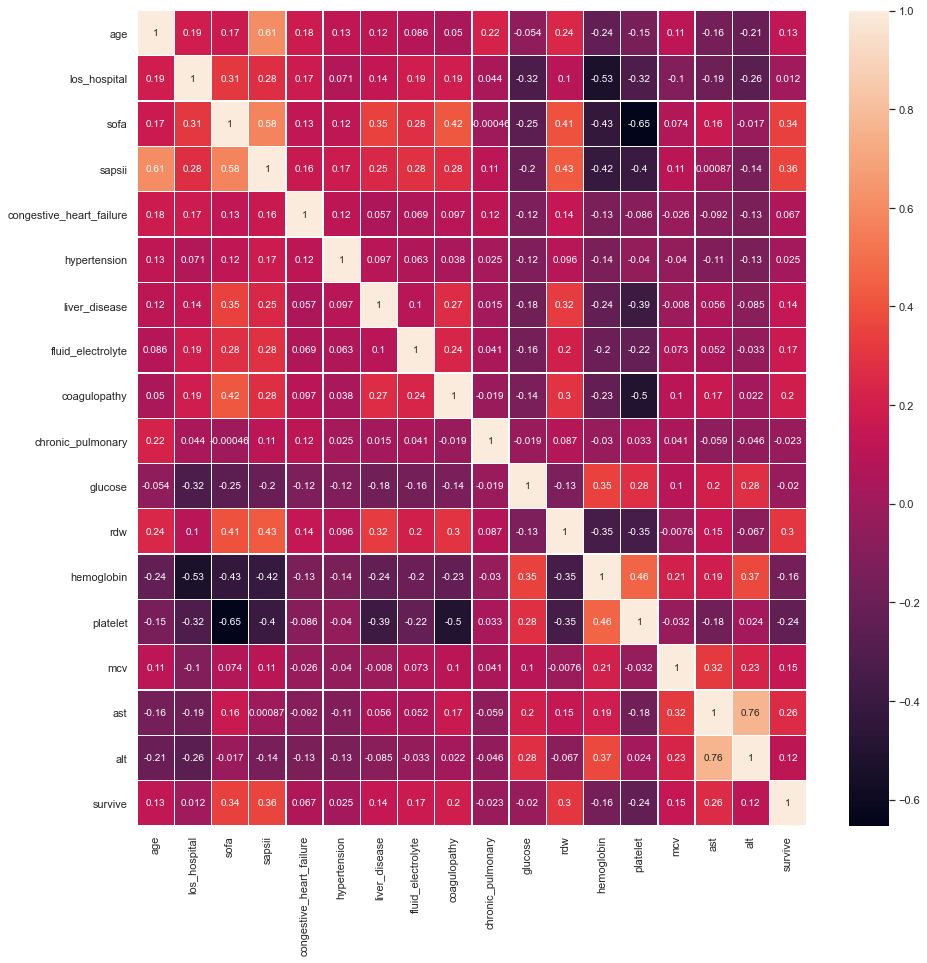

In [34]:
plt.figure(figsize=(15,15))
corr = data.corr(method='spearman')
sns.heatmap(corr, annot=True, linewidths=0.3)

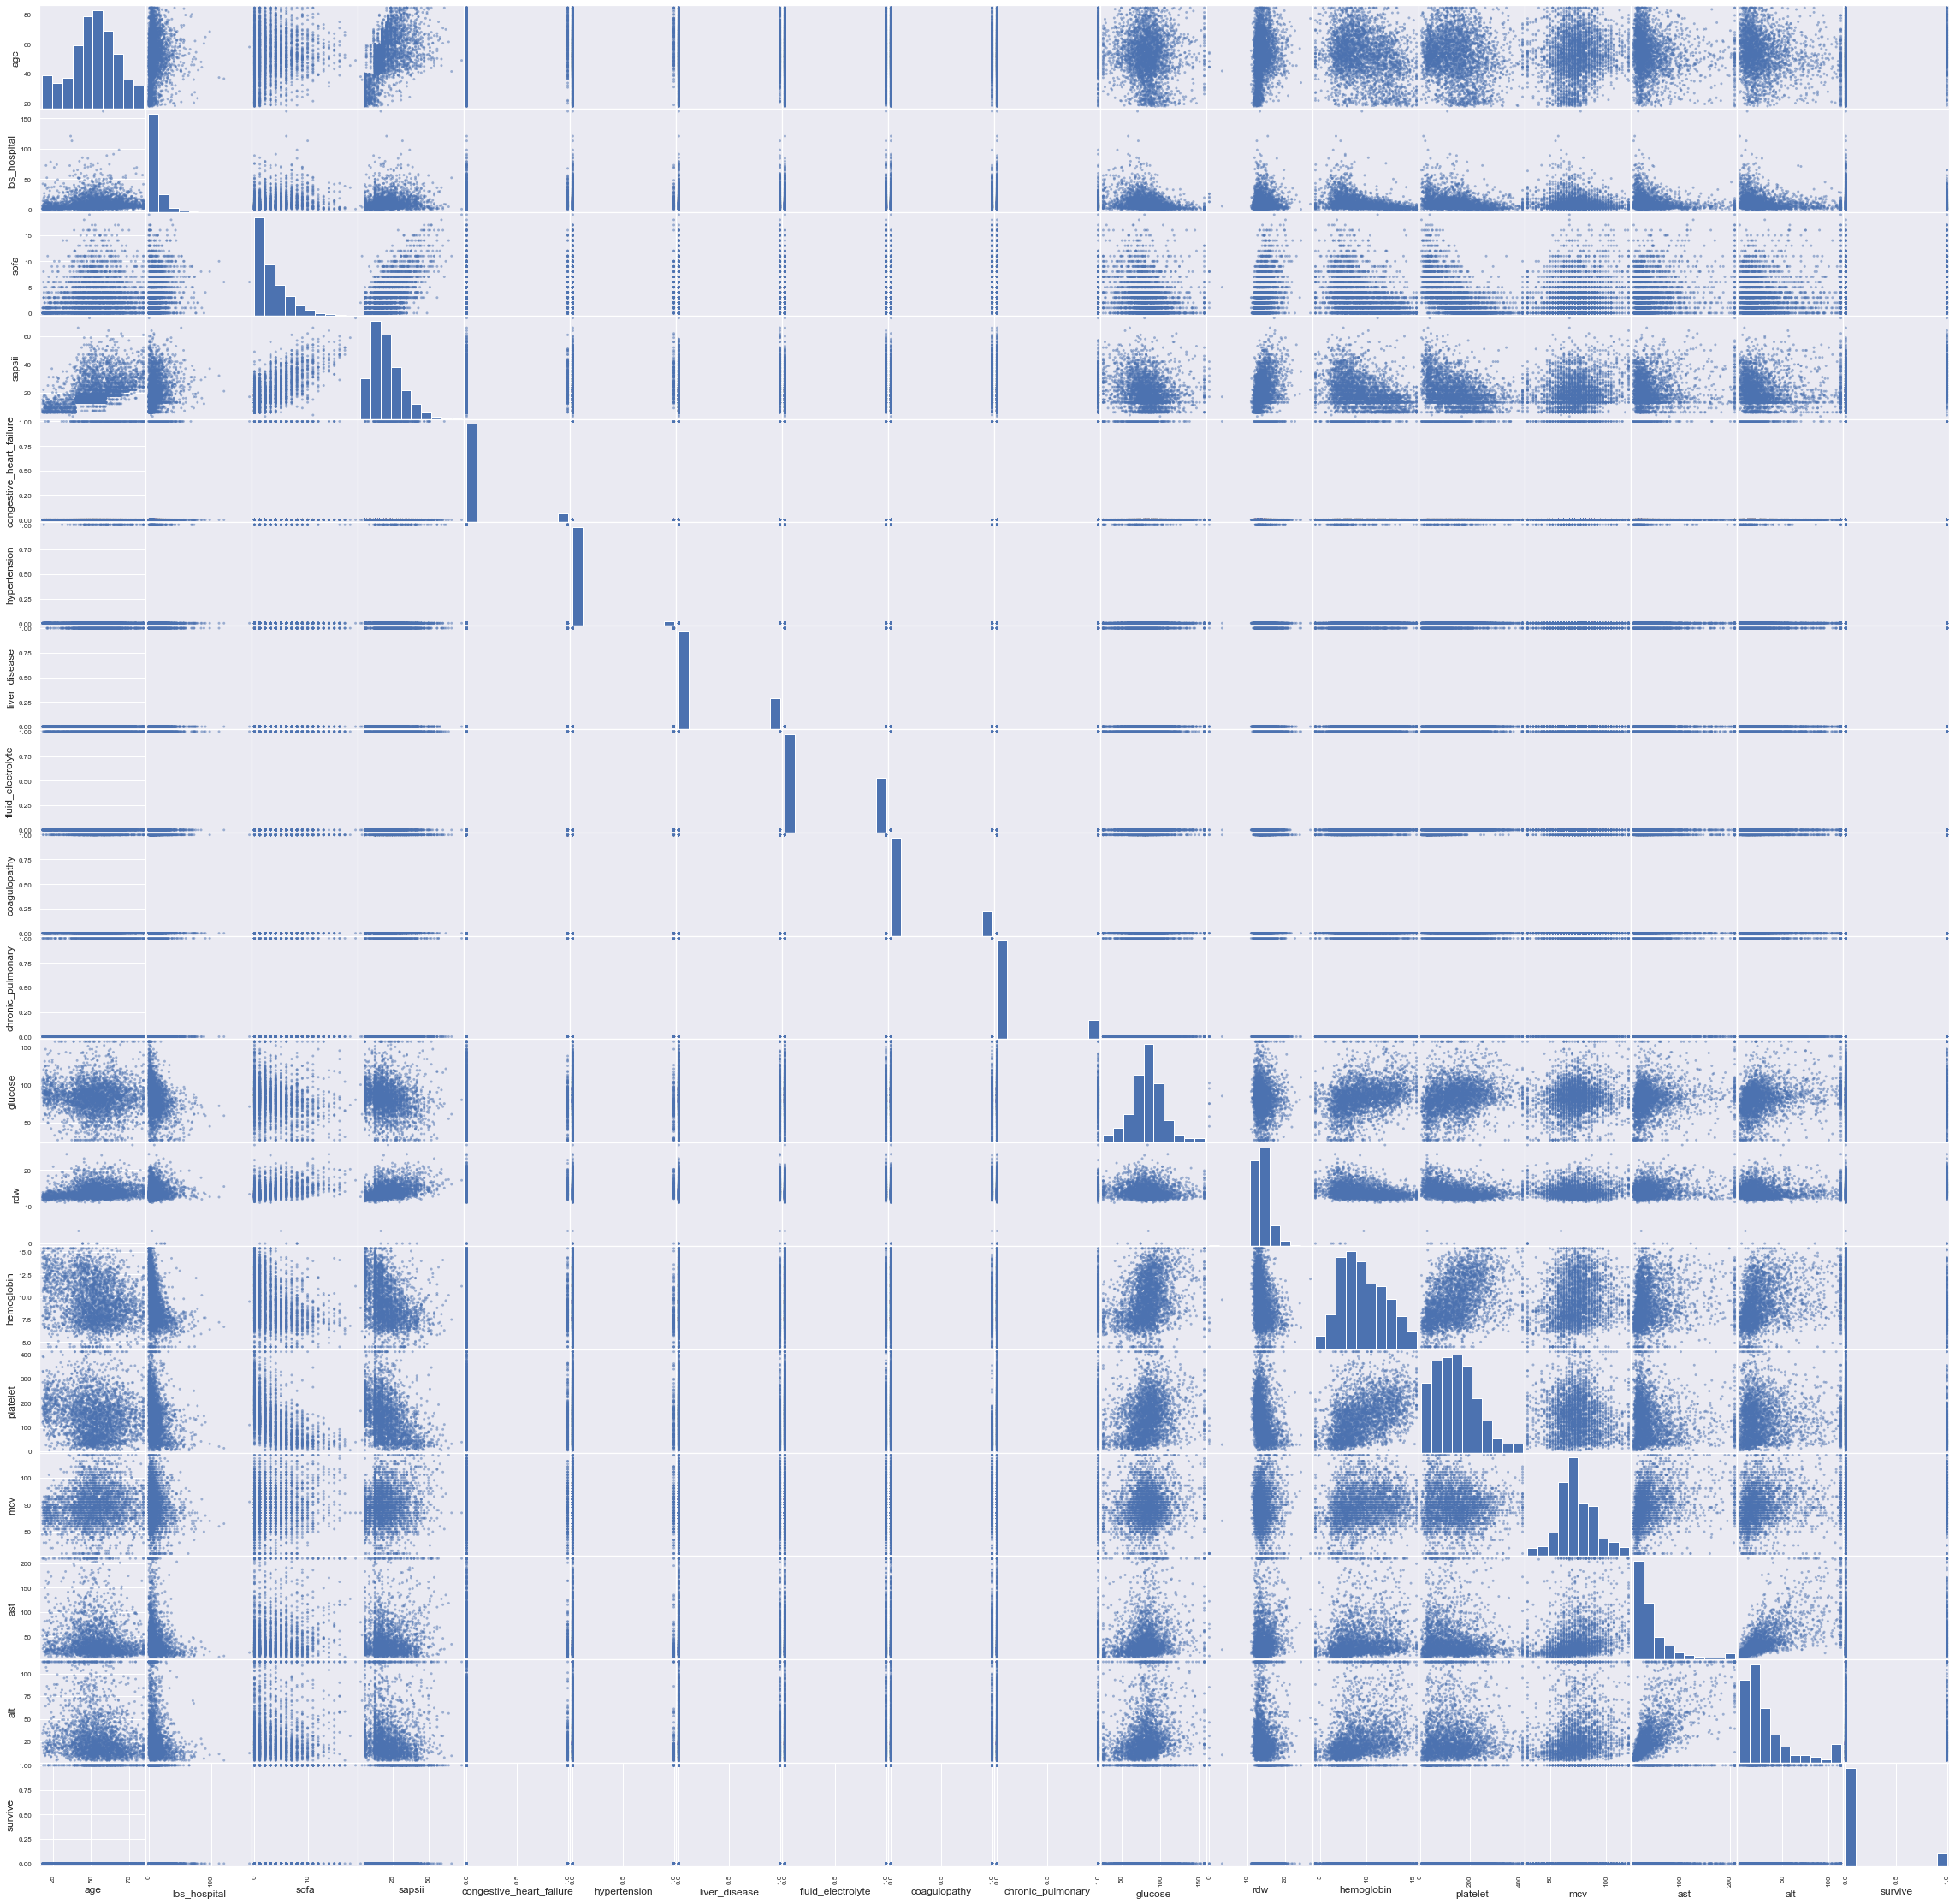

In [35]:
pd.plotting.scatter_matrix(data,alpha = 0.5,figsize=(40,40),ax=None,grid=False,diagonal='hist',marker='.',density_kwds=None,
                           hist_kwds=None);

Text(0, 0.5, 'Age')

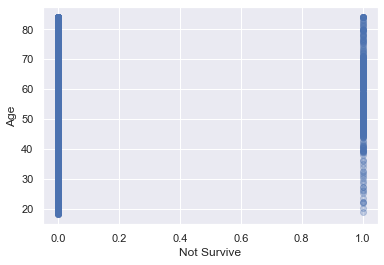

In [36]:
sns.boxplot(data.survive, data.age)

<AxesSubplot:xlabel='gender'>

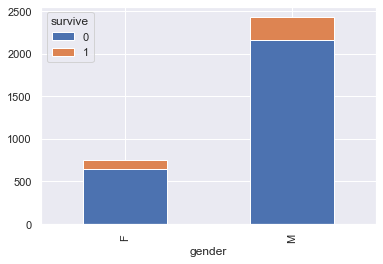

In [38]:
pd.crosstab(data['gender'],data['survive']).plot(kind='bar',stacked = True)

<AxesSubplot:xlabel='sofa'>

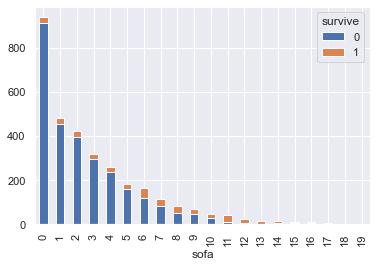

In [39]:
pd.crosstab(data['sofa'],data['survive']).plot(kind='bar',stacked = True)

<AxesSubplot:xlabel='sapsii'>

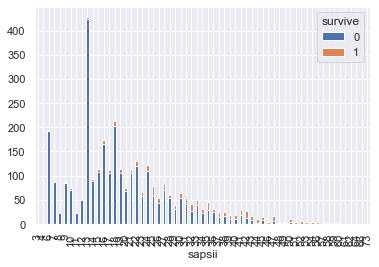

In [40]:
pd.crosstab(data['sapsii'],data['survive']).plot(kind='bar',stacked = True)

<AxesSubplot:xlabel='congestive_heart_failure'>

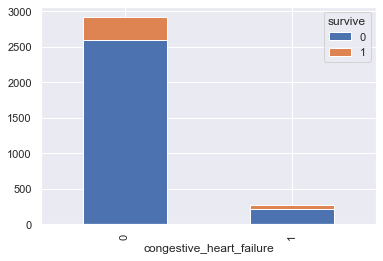

In [41]:
pd.crosstab(data['congestive_heart_failure'],data['survive']).plot(kind='bar',stacked = True)

<AxesSubplot:xlabel='hypertension'>

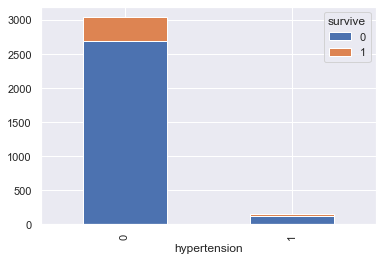

In [42]:
pd.crosstab(data['hypertension'],data['survive']).plot(kind='bar',stacked = True)

<AxesSubplot:xlabel='liver_disease'>

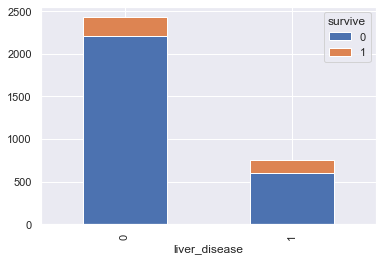

In [43]:
pd.crosstab(data['liver_disease'],data['survive']).plot(kind='bar',stacked = True)

<AxesSubplot:xlabel='fluid_electrolyte'>

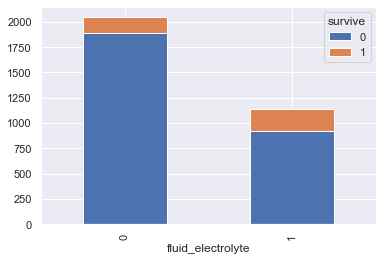

In [44]:
pd.crosstab(data['fluid_electrolyte'],data['survive']).plot(kind='bar',stacked = True)

<AxesSubplot:xlabel='coagulopathy'>

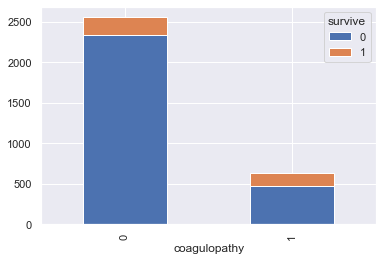

In [45]:
pd.crosstab(data['coagulopathy'],data['survive']).plot(kind='bar',stacked = True)

<AxesSubplot:xlabel='chronic_pulmonary'>

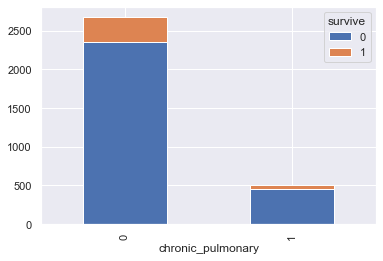

In [46]:
pd.crosstab(data['chronic_pulmonary'],data['survive']).plot(kind='bar',stacked = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survive', ylabel='rdw'>

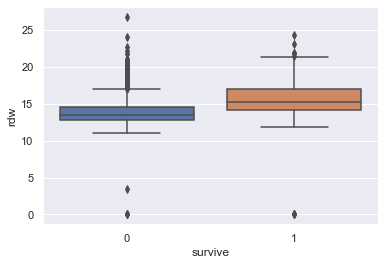

In [47]:
sns.boxplot(data.survive, data.rdw)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survive', ylabel='hemoglobin'>

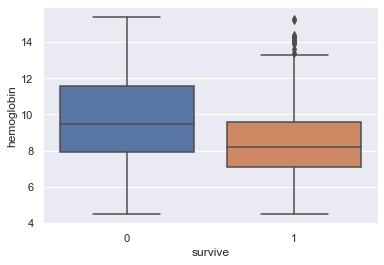

In [48]:
sns.boxplot(data.survive, data.hemoglobin)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survive', ylabel='platelet'>

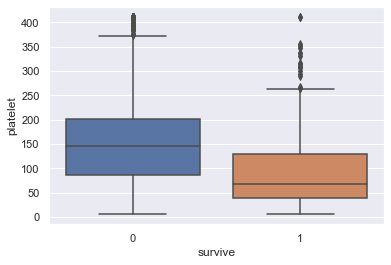

In [49]:
sns.boxplot(data.survive, data.platelet)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survive', ylabel='alt'>

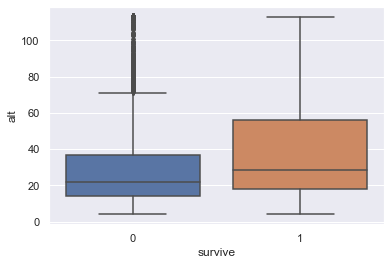

In [50]:
sns.boxplot(data.survive, data.alt)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survive', ylabel='ast'>

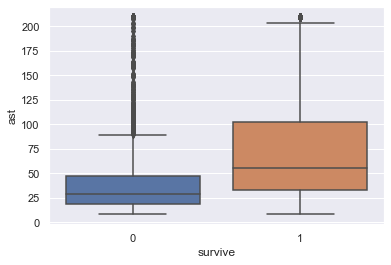

In [51]:
sns.boxplot(data.survive, data.ast)


<AxesSubplot:xlabel='age', ylabel='los_hospital'>

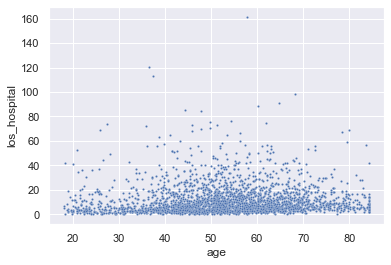

In [95]:
sns.scatterplot(data=data, x="age", y="los_hospital",s = 5)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sofa', ylabel='los_hospital'>

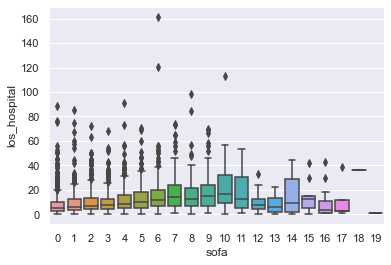

In [124]:
sns.boxplot(data.sofa, data.los_hospital)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sapsii', ylabel='los_hospital'>

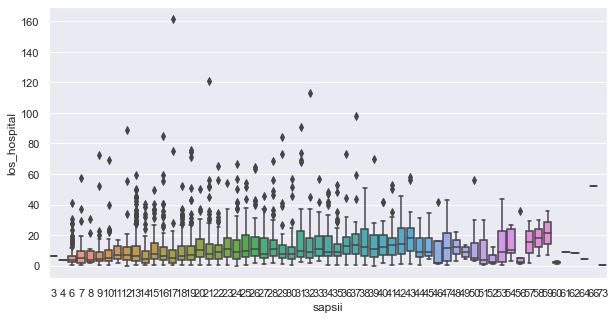

In [132]:
sns.set(rc={"figure.figsize":(10, 5)}) #width=3, #height=4
sns.boxplot(data.sapsii, data.los_hospital, )


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='congestive_heart_failure', ylabel='los_hospital'>

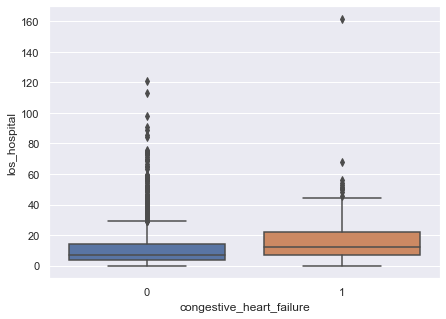

In [134]:
sns.set(rc={"figure.figsize":(7, 5)}) #width=3, #height=4
sns.boxplot(data.congestive_heart_failure, data.los_hospital)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hypertension', ylabel='los_hospital'>

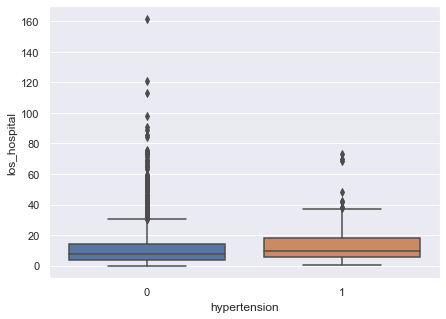

In [135]:
sns.boxplot(data.hypertension, data.los_hospital)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='liver_disease', ylabel='los_hospital'>

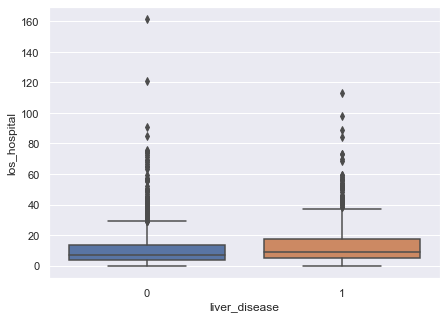

In [136]:
sns.boxplot(data.liver_disease, data.los_hospital)
# sns.scatterplot(data=data, x="liver_disease", y="los_hospital",s = 5)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fluid_electrolyte', ylabel='los_hospital'>

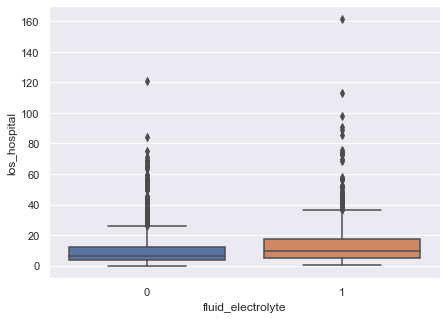

In [137]:
sns.boxplot(data.fluid_electrolyte, data.los_hospital)
# sns.scatterplot(data=data, x="liver_disease", y="los_hospital",s = 5)
# sns.scatterplot(data=data, x="fluid_electrolyte", y="los_hospital",s = 5)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='coagulopathy', ylabel='los_hospital'>

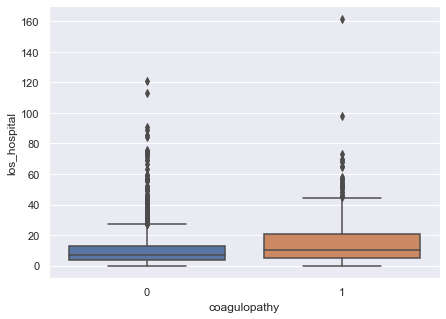

In [138]:
sns.boxplot(data.coagulopathy, data.los_hospital)
# sns.scatterplot(data=data, x="coagulopathy", y="los_hospital",s = 5)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chronic_pulmonary', ylabel='los_hospital'>

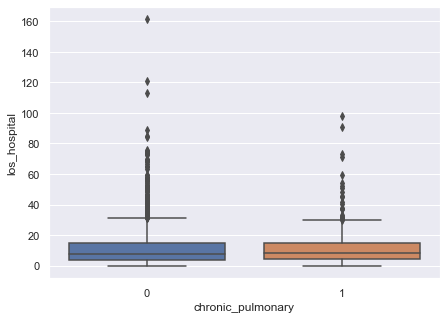

In [139]:
sns.boxplot(data.chronic_pulmonary, data.los_hospital)
# sns.scatterplot(data=data, x="coagulopathy", y="los_hospital",s = 5)

<AxesSubplot:xlabel='glucose', ylabel='los_hospital'>

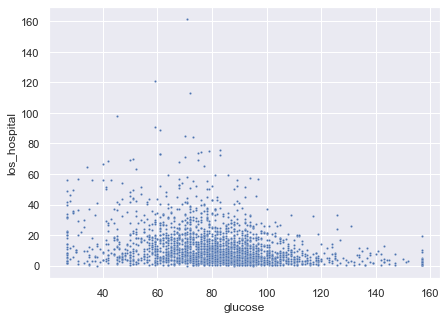

In [140]:
sns.scatterplot(data=data, x="glucose", y="los_hospital",s = 5)

<AxesSubplot:xlabel='rdw', ylabel='los_hospital'>

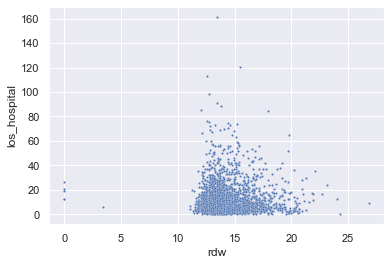

In [106]:
sns.scatterplot(data=data, x="rdw", y="los_hospital",s = 5)

<AxesSubplot:xlabel='platelet', ylabel='los_hospital'>

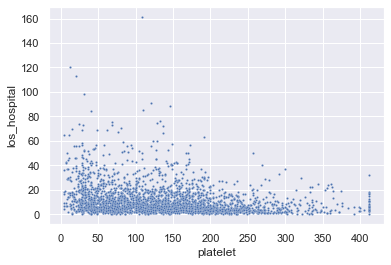

In [107]:
sns.scatterplot(data=data, x="platelet", y="los_hospital",s = 5)

<AxesSubplot:xlabel='hemoglobin', ylabel='los_hospital'>

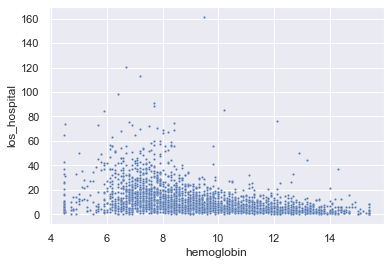

In [108]:
sns.scatterplot(data=data, x="hemoglobin", y="los_hospital",s = 5)

<AxesSubplot:xlabel='mcv', ylabel='los_hospital'>

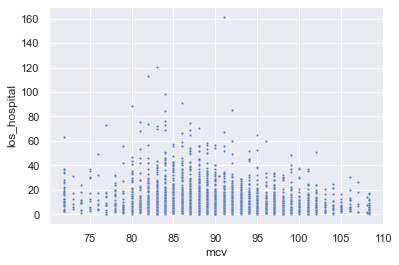

In [109]:
sns.scatterplot(data=data, x="mcv", y="los_hospital",s = 5)

<AxesSubplot:xlabel='ast', ylabel='los_hospital'>

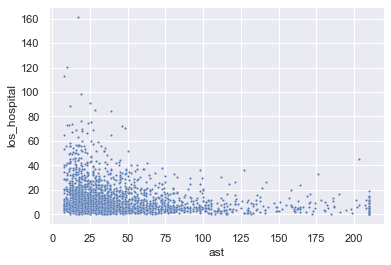

In [110]:
sns.scatterplot(data=data, x="ast", y="los_hospital",s = 5)

<AxesSubplot:xlabel='alt', ylabel='los_hospital'>

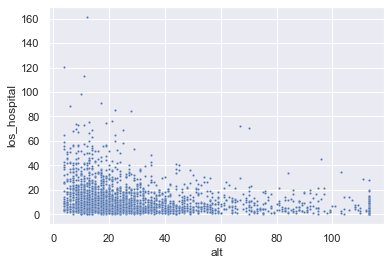

In [111]:
sns.scatterplot(data=data, x="alt", y="los_hospital",s = 5)

In [52]:
# Code for getting multiple percentiles for all the columns 
percentile_values = [0.5,0.8,0.85,0.9,0.95,1]
Values=[]
def quantiles(column):
    for i in percentile_values:
        Values = column.quantile(i)
        print('Percentile - ', i, 'is', Values)

In [60]:
data = pd.get_dummies(data, columns = ['gender' , 'ethnicity'])

In [61]:
## we split the data between training (70% of the data) and testing set (30% of the data)
from sklearn.model_selection import train_test_split
data= data.dropna()
y = data['survive'].astype('int32')
X = data.drop(columns=['survive','alt','sofa','los_hospital'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=88)
X_train.shape, X_test.shape
X_test.head()

,age,sapsii,congestive_heart_failure,hypertension,liver_disease,fluid_electrolyte,coagulopathy,chronic_pulmonary,glucose,rdw,...,ethnicity_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,ethnicity_OTHER,ethnicity_PATIENT DECLINED TO ANSWER,ethnicity_PORTUGUESE,ethnicity_SOUTH AMERICAN,ethnicity_UNABLE TO OBTAIN,ethnicity_UNKNOWN/NOT SPECIFIED,ethnicity_WHITE,ethnicity_WHITE - OTHER EUROPEAN,ethnicity_WHITE - RUSSIAN
74,61.3495,26,0,0,1,0,0,0,55.00,14.1,...,0,0,0,0,0,0,0,1,0,0
3007,31.3378,6,0,0,0,1,0,0,99.00,12.6,...,0,0,0,0,0,0,0,1,0,0
2185,28.5660,30,0,0,0,1,0,0,78.00,13.6,...,0,0,0,0,0,0,0,0,0,0
1142,54.1720,27,0,0,1,0,0,0,26.78,18.2,...,0,0,0,0,0,0,0,1,0,0
1393,73.2954,22,0,0,0,0,0,0,95.00,13.5,...,0,0,0,0,0,0,0,1,0,0


### Baseline model.

In [62]:
print('ACC_baseline = ', max(y_test.value_counts()[0] , y_test.value_counts()[1]) / (y_test.value_counts()[0] + y_test.value_counts()[1]) ) 

ACC_baseline =  0.867080745341615


### First model : logistic regression

In [63]:
X_train_log = X_train
X_test_log = X_test

In [64]:
## fit the logistic model

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=88, max_iter=1000)
logreg.fit(X_train_log, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=88)

In [65]:
## build the confusion matrix

y_prob = logreg.predict_proba(X_test_log)
y_pred_log = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]], index=y_test.index)


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred_log)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred_log))

Confusion Matrix: 
 [[680  18]
 [ 64  43]]

Accuracy: 0.8981366459627329


(5000,)


<Figure size 432x288 with 0 Axes>

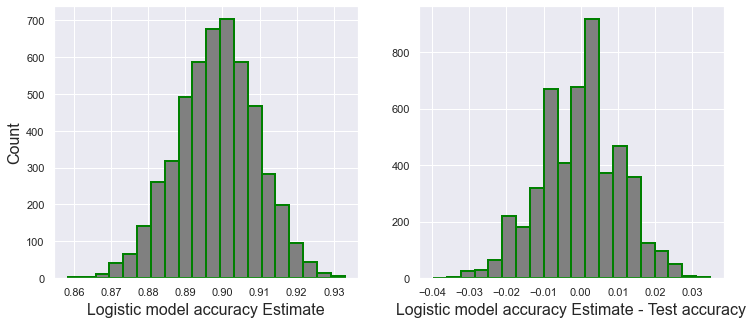

The 95-percent confidence interval of accuracy of the logistic regression model is [-0.02236025  0.01987578]


In [66]:
# below is the code to use bootstrap on logistic model. 

import time
#below is a manual implementation of bootstrap for model valiation for the different models.
def bootstrap_validation(test_data, test_label, train_label, model, metrics, sample=500, random_state=66):
    tic = time.time()
    n_sample = sample
    output_array=np.zeros(n_sample)
    output_array[:]=np.nan
    print(output_array.shape)
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
        bs_predicted = model.predict(bs_data)
        output_array[bs_iter]=metrics(bs_predicted,bs_label)
#       acc2if bs_iter % 100 == 0:
#             print(bs_iter, time.time()-tic)
    output_df = pd.DataFrame(output_array)
    return output_df

bs_output_logreg = bootstrap_validation(X_test_log, y_test ,y_train ,logreg,
                                 metrics=accuracy_score,
                                 sample = 5000)

test_accuracy_logreg = accuracy_score(y_test ,y_pred_log)

# Basic plot and centered plot
plt.figure()
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Logistic model accuracy Estimate', fontsize=16)
axs[1].set_xlabel('Logistic model accuracy Estimate - Test accuracy', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output_logreg.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].hist(bs_output_logreg.iloc[:,0]-test_accuracy_logreg, bins=20,edgecolor='green', linewidth=2,color = "grey")
plt.show()

# The 95% confidence interval of the logistic regression model. 
CI_logreg= np.quantile(bs_output_logreg.iloc[:,0]-test_accuracy_logreg,np.array([0.025,0.975]))
print("The 95-percent confidence interval of accuracy of the logistic regression model is %s" % CI_logreg)

## Second model : Linear discriminant Analysis



In [67]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train_log, y_train)

LinearDiscriminantAnalysis()

In [68]:
y_pred_lda = lda.predict(X_test_log)
cm = confusion_matrix(y_test, y_pred_lda)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred_lda))

Confusion Matrix: 
 [[662  36]
 [ 58  49]]

Accuracy: 0.8832298136645963


(5000,)


<Figure size 432x288 with 0 Axes>

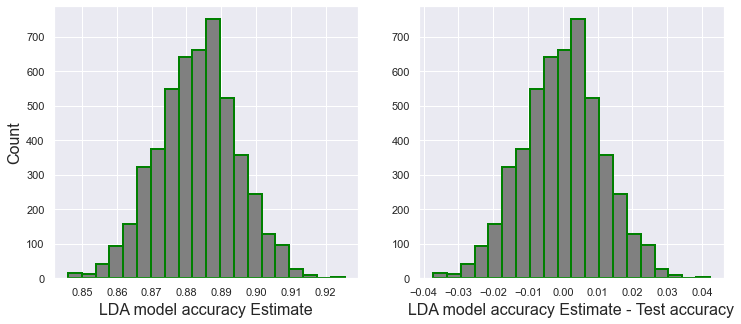

The 95-percent confidence interval of accuracy of the lda model is [-0.02236025  0.02236025]


In [69]:
bs_output_lda = bootstrap_validation(X_test_log, y_test ,y_train ,lda,
                                 metrics=accuracy_score,
                                 sample = 5000)

test_accuracy_lda = accuracy_score(y_test ,y_pred_lda)

# Basic plot and centered plot
plt.figure()
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('LDA model accuracy Estimate', fontsize=16)
axs[1].set_xlabel('LDA model accuracy Estimate - Test accuracy', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output_lda.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].hist(bs_output_lda.iloc[:,0]-test_accuracy_lda, bins=20,edgecolor='green', linewidth=2,color = "grey")
plt.show()

# The 95% confidence interval of the lda  model. 
CI_lda= np.quantile(bs_output_lda.iloc[:,0]-test_accuracy_lda,np.array([0.025,0.975]))
print("The 95-percent confidence interval of accuracy of the lda model is %s" % CI_lda)

## Third model : random forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features=5, min_samples_leaf=5, n_estimators=500, random_state=88)
rf.fit(X_train_log, y_train)

RandomForestClassifier(max_features=5, min_samples_leaf=5, n_estimators=500,
                       random_state=88)

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred_rf = rf.predict(X_test_log)
cm = confusion_matrix(y_test, y_pred_rf)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred_rf))

Confusion Matrix: 
 [[695   3]
 [ 90  17]]

Accuracy: 0.884472049689441


(3000,)


<Figure size 432x288 with 0 Axes>

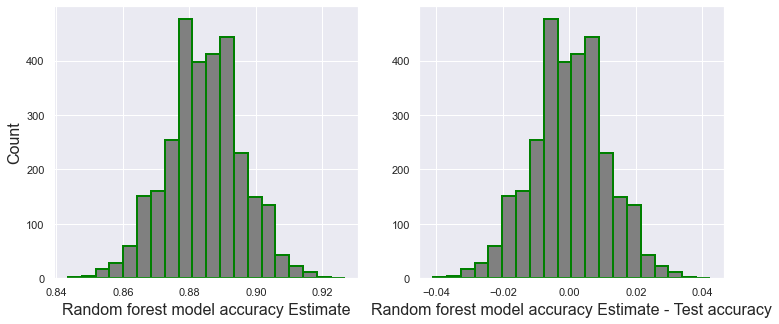

The 95-percent confidence interval of accuracy of the random forest model is [-0.02236025  0.02236025]


In [72]:
bs_output_rf = bootstrap_validation(X_test_log, y_test ,y_train ,rf,
                                 metrics=accuracy_score,
                                 sample = 3000)

test_accuracy_rf = accuracy_score(y_test ,y_pred_rf)

# Basic plot and centered plot
plt.figure()
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Random forest model accuracy Estimate', fontsize=16)
axs[1].set_xlabel('Random forest model accuracy Estimate - Test accuracy', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output_rf.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].hist(bs_output_rf.iloc[:,0]-test_accuracy_rf, bins=20,edgecolor='green', linewidth=2,color = "grey")
plt.show()

# The 95% confidence interval of the random forest  model. 
CI_rf= np.quantile(bs_output_rf.iloc[:,0]-test_accuracy_rf,np.array([0.025,0.975]))
print("The 95-percent confidence interval of accuracy of the random forest model is %s" % CI_rf)

In [73]:
# Fit the logistic regression model

#data_log = X_train 
#data_log["survive"] = y_train

#logreg = smf.logit(formula = 'survive ~ Unnamed: 0 + subject_id + hadm_id + icustay_id + gender + age + ethnicity + los_hospital + los_icu+ first_icu_stay + sofa + sapsii + congestive_heart_failure + hypertension + liver_disease + fluid_electrolyte + coagulopathy + chronic_pulmonary + glucose + rdw + hemoglobin + platelet + mcv + ast + alt + admittime  ',
#                   data = data_log ).fit()

#print(logreg.summary())


## Fourth model : Decision Tree with Cross validation

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_values = {'ccp_alpha': np.linspace(0, 0.1, 101)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=10).fit(X_train_log, y_train)

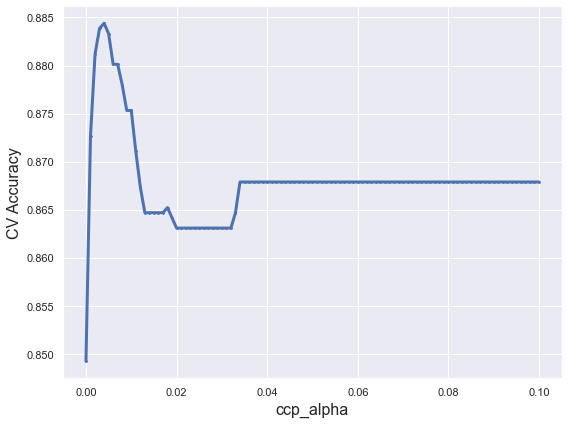

Best ccp_alpha {'ccp_alpha': 0.004}


In [75]:
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

Node count = 13


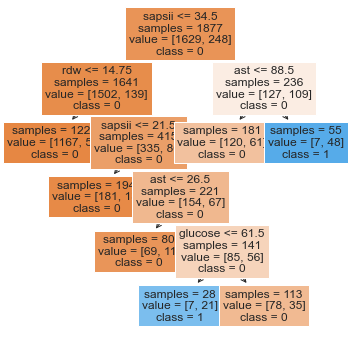

In [76]:
from sklearn.tree import plot_tree

print('Node count =', dtc_cv.best_estimator_.tree_.node_count)
plt.figure(figsize=(6,6))
plot_tree(dtc_cv.best_estimator_, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          fontsize=12) 
plt.show()

In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred_dtc = dtc_cv.predict(X_test_log)
cm = confusion_matrix(y_test, y_pred_dtc)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred_dtc))

Confusion Matrix: 
 [[690   8]
 [ 81  26]]

Accuracy: 0.8894409937888199


(3000,)


<Figure size 432x288 with 0 Axes>

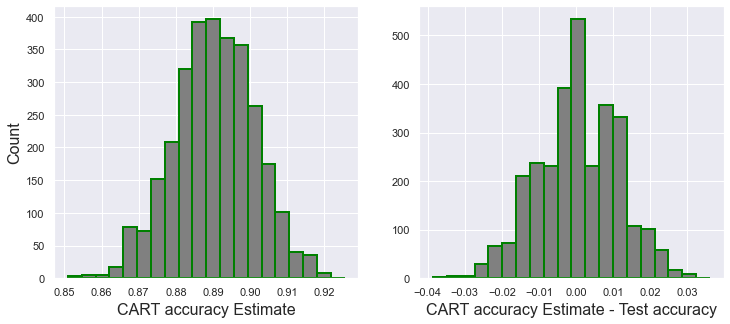

The 95-percent confidence interval of accuracy of the CART model is [-0.02111801  0.02111801]


In [78]:
bs_output_CART = bootstrap_validation(X_test_log, y_test ,y_train ,dtc_cv,
                                 metrics=accuracy_score,
                                 sample = 3000)

test_accuracy_CART = accuracy_score(y_test ,y_pred_dtc)

# Basic plot and centered plot
plt.figure()
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('CART accuracy Estimate', fontsize=16)
axs[1].set_xlabel('CART accuracy Estimate - Test accuracy', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output_CART.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].hist(bs_output_CART.iloc[:,0]-test_accuracy_CART, bins=20,edgecolor='green', linewidth=2,color = "grey")
plt.show()

# The 95% confidence interval of the CART model. 
CI_CART= np.quantile(bs_output_CART.iloc[:,0]-test_accuracy_CART,np.array([0.025,0.975]))
print("The 95-percent confidence interval of accuracy of the CART model is %s" % CI_CART)

## Random Forest with cross validation

In [79]:
import time

grid_values = {'max_features': np.linspace(5,50,10, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [88]} 

tic = time.time()

rf = RandomForestClassifier() 
rf_cv = GridSearchCV(rf, param_grid=grid_values, cv=5)
rf_cv.fit(X_train_log, y_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

time: 74.49 s


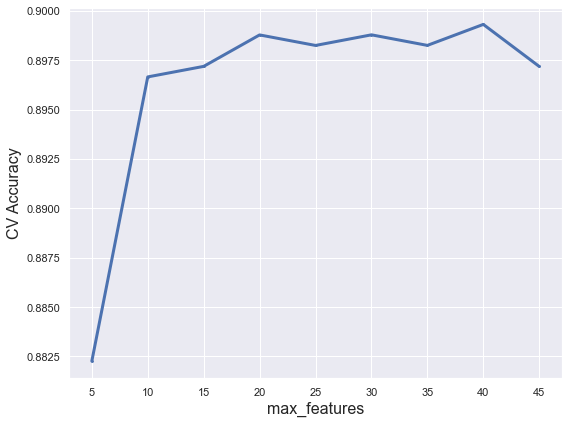

Best parameters {'max_features': 40, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 88}


In [80]:
max_features = rf_cv.cv_results_['param_max_features'].data
ACC_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max_features', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(max_features, ACC_scores, s=3)
plt.plot(max_features, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best parameters', rf_cv.best_params_)

In [81]:
y_pred_rf_cv = rf_cv.predict(X_test_log)
cm = confusion_matrix(y_test, y_pred_rf_cv)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred_rf_cv))

Confusion Matrix: 
 [[679  19]
 [ 70  37]]

Accuracy: 0.8894409937888199


(3000,)


<Figure size 432x288 with 0 Axes>

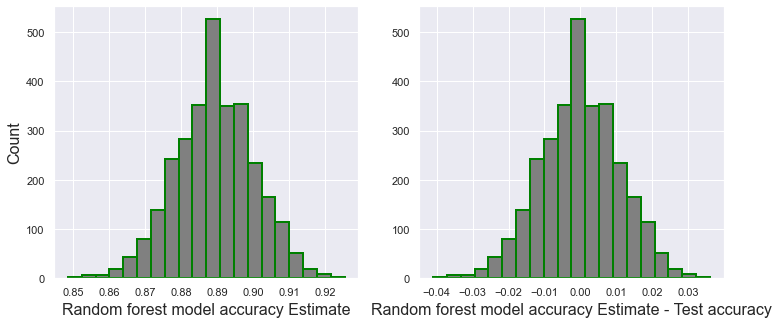

The 95-percent confidence interval of accuracy of the random forest model is [-0.02236025  0.02111801]
time: 208.88 s


In [82]:
tic = time.time()
bs_output_rf_cv = bootstrap_validation(X_test_log, y_test ,y_train ,rf_cv,
                                 metrics=accuracy_score,
                                 sample = 3000)

test_accuracy_rf_cv = accuracy_score(y_test ,y_pred_rf_cv)

# Basic plot and centered plot
plt.figure()
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Random forest model accuracy Estimate', fontsize=16)
axs[1].set_xlabel('Random forest model accuracy Estimate - Test accuracy', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output_rf_cv.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].hist(bs_output_rf_cv.iloc[:,0]-test_accuracy_rf_cv, bins=20,edgecolor='green', linewidth=2,color = "grey")
plt.show()

# The 95% confidence interval of the random forest  model. 
CI_rf_cv= np.quantile(bs_output_rf_cv.iloc[:,0]-test_accuracy_rf_cv,np.array([0.025,0.975]))
print("The 95-percent confidence interval of accuracy of the random forest model is %s" % CI_rf_cv)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

## Boosting model

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

grid_values = {'n_estimators': np.linspace(100, 5000, 10, dtype='int32'),  # np.logspace(6, 12, num=7, base=2, dtype='int32'),
               'learning_rate': [0.01],
               'max_leaf_nodes': np.linspace(2, 10, 1, dtype='int32'),
               'max_depth': [100],
               'min_samples_leaf': [10],
               'random_state': [88]} 

tic = time.time()

gbc = GradientBoostingClassifier()
gbc_cv = GridSearchCV(gbc, param_grid=grid_values, cv=5)
gbc_cv.fit(X_train_log, y_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

time: 218.57 s


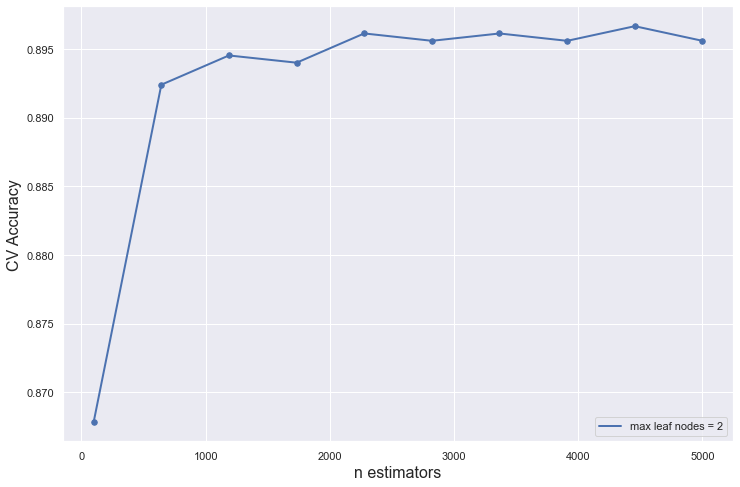

In [84]:
n_estimators = gbc_cv.cv_results_['param_n_estimators'].data
cv_acc_scores = gbc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(12, 8))
plt.xlabel('n estimators', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.grid(True, which='both')

N = len(grid_values['max_leaf_nodes'])
M = len(grid_values['n_estimators'])
for i in range(N):
    plt.scatter(n_estimators[(M*i):(M*i)+M], cv_acc_scores[(M*i):(M*i)+M], s=30)
    plt.plot(n_estimators[(M*i):(M*i)+M], cv_acc_scores[(M*i):(M*i)+M], linewidth=2,
             label='max leaf nodes = '+str(grid_values['max_leaf_nodes'][i]))
plt.legend(loc='lower right')
plt.show()

In [85]:
y_pred_boost = gbc_cv.predict(X_test_log)
cm = confusion_matrix(y_test, y_pred_boost)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred_boost))

Confusion Matrix: 
 [[674  24]
 [ 59  48]]

Accuracy: 0.8968944099378882


(3000,)


<Figure size 432x288 with 0 Axes>

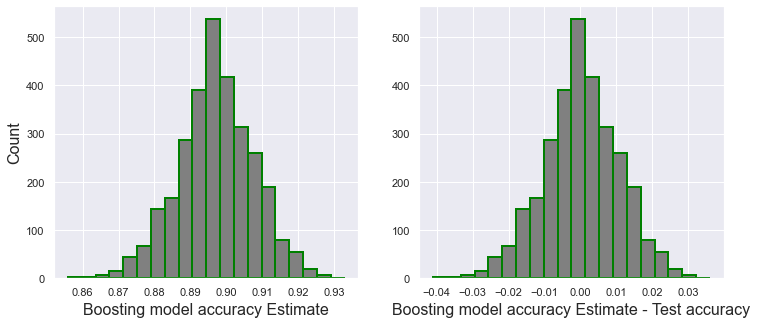

The 95-percent confidence interval of accuracy of the boosting model is [-0.02111801  0.02111801]


In [86]:
bs_output_boost = bootstrap_validation(X_test_log, y_test ,y_train ,gbc_cv,
                                 metrics=accuracy_score,
                                 sample = 3000)

test_accuracy_boost = accuracy_score(y_test ,y_pred_boost)

# Basic plot and centered plot
plt.figure()
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Boosting model accuracy Estimate', fontsize=16)
axs[1].set_xlabel('Boosting model accuracy Estimate - Test accuracy', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output_boost.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].hist(bs_output_boost.iloc[:,0]-test_accuracy_boost, bins=20,edgecolor='green', linewidth=2,color = "grey")
plt.show()

# The 95% confidence interval of the boosting  model. 
CI_boost= np.quantile(bs_output_boost.iloc[:,0]-test_accuracy_boost,np.array([0.025,0.975]))
print("The 95-percent confidence interval of accuracy of the boosting model is %s" % CI_boost)

In [87]:
# below is the code to compare the accuracy and the confidence interval of the baseline, CART, bagging, Random Forest, and boosting models from part (b).

comparison_data = {'Baseline model': ['{:.3f}'.format(max(y_test.value_counts()[0] , y_test.value_counts()[1]) / (y_test.value_counts()[0] + y_test.value_counts()[1]) ),
                                         '{:.4s}'.format('NaN') , '{:.4s}'.format('NaN')],
                    'Logistic Regression': ['{:.3f}'.format(accuracy_score(y_test, y_pred_log)),
                                         '{:.4f}'.format(CI_logreg[0]) , '{:.4f}'.format(CI_logreg[1])],
                   'Linear discriminant Analysis': ['{:.3f}'.format(accuracy_score(y_test, y_pred_lda)),
                                         '{:.4f}'.format(CI_lda[0]) , '{:.4f}'.format(CI_lda[1])],
                   'CART with CV': ['{:.3f}'.format(accuracy_score(y_test, y_pred_dtc)),
                                         '{:.4f}'.format(CI_CART[0]) , '{:.4f}'.format(CI_CART[1])],
                   'Random Forest with CV': ['{:.3f}'.format(accuracy_score(y_test, y_pred_rf_cv)),
                                         '{:.4f}'.format(CI_rf_cv[0]) , '{:.4f}'.format(CI_rf_cv[1])],
                   'Boosting model with CV':['{:.3f}'.format(accuracy_score(y_test, y_pred_boost)),
                                         '{:.4f}'.format(CI_boost[0]) , '{:.4f}'.format(CI_boost[1])]}

comparison_table = pd.DataFrame(data=comparison_data, index=['Accuracy' , 'Lower Bound CI - Accuracy' , 'Upper Bound CI - Accuracy'])
comparison_table.style.set_properties(**{'font-size': '14pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}])

,Baseline model,Logistic Regression,Linear discriminant Analysis,CART with CV,Random Forest with CV,Boosting model with CV
Accuracy,0.867,0.898,0.883,0.889,0.889,0.897
Lower Bound CI - Accuracy,NaN,-0.0224,-0.0224,-0.0211,-0.0224,-0.0211
Upper Bound CI - Accuracy,NaN,0.0199,0.0224,0.0211,0.0211,0.0211


## Models building to predict the length of stay at the hospital

We want to predict how long the patient is staying at the hospital

In [141]:
## we split the data between training (70% of the data) and testing set (30% of the data)
from sklearn.model_selection import train_test_split

print(data.size)
data.info()

y = data['los_hospital'].astype('float64')
X = data.drop(columns=['los_hospital','ast','sofa','survive'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)
X_train.shape, X_test.shape
X_test.head()


131418
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2682 entries, 0 to 3185
Data columns (total 49 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   age                                                                 2682 non-null   float64
 1   los_hospital                                                        2682 non-null   float64
 2   sofa                                                                2682 non-null   int64  
 3   sapsii                                                              2682 non-null   int64  
 4   congestive_heart_failure                                            2682 non-null   int64  
 5   hypertension                                                        2682 non-null   int64  
 6   liver_disease                                                       2682 non-null   int64  
 7   fluid_el

,age,sapsii,congestive_heart_failure,hypertension,liver_disease,fluid_electrolyte,coagulopathy,chronic_pulmonary,glucose,rdw,...,ethnicity_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,ethnicity_OTHER,ethnicity_PATIENT DECLINED TO ANSWER,ethnicity_PORTUGUESE,ethnicity_SOUTH AMERICAN,ethnicity_UNABLE TO OBTAIN,ethnicity_UNKNOWN/NOT SPECIFIED,ethnicity_WHITE,ethnicity_WHITE - OTHER EUROPEAN,ethnicity_WHITE - RUSSIAN
964,61.7129,33,0,0,1,0,1,0,64.0,14.8,...,0,0,0,0,0,0,0,1,0,0
158,43.1403,34,0,1,1,0,1,0,59.0,14.1,...,0,0,0,0,0,0,0,1,0,0
1091,53.7306,15,0,0,0,0,0,0,110.0,12.1,...,0,0,0,0,0,0,0,1,0,0
3031,69.5552,18,0,0,0,1,0,1,100.0,12.4,...,0,0,0,0,0,0,0,1,0,0
3170,58.5436,13,1,0,0,0,0,0,86.0,14.8,...,0,0,0,0,0,1,0,0,0,0


## Baseline model

In [142]:
def baseline_model(y):
    ave = 0
    n = len(y)
    for i in range(n):
        ave += y.values[i]/n
    y_pred = [ave]*n
    return y_pred

y_pred_baseline_train = baseline_model(y_train)
y_pred_baseline = baseline_model(y_test)

In [143]:
def R_squared(predictions, y_train):
    SSE = np.sum((y_train-predictions)**2)
    SST = np.sum((y_train-np.mean(y_train))**2)
    r2 = 1-SSE/SST
    return r2

def OS_R_squared(predictions, y_test,y_train):
    SSE = np.sum((y_test-predictions)**2)
    SST = np.sum((y_test-np.mean(y_train))**2)
    r2 = 1-SSE/SST
    return r2

def mean_squared_error(predictions, y_test,y_train):
    MSE = np.mean((y_test-predictions)**2)
    return MSE

def mean_absolute_error(predictions, y_test,y_train):
    MAE = np.mean(np.abs(y_test-predictions))
    return MAE

In [144]:
print('R2_baseline =', R_squared(y_pred_baseline_train,y_train))
print('OSR2_baseline =', OS_R_squared(y_pred_baseline, y_test,y_train))
print('MSE_baseline =', mean_squared_error(y_pred_baseline, y_test,y_train))
print('MAE_baseline =', mean_absolute_error(y_pred_baseline, y_test,y_train))

R2_baseline = 2.220446049250313e-16
OSR2_baseline = 0.0006254919013028992
MSE_baseline = 169.2002322106012
MAE_baseline = 8.284761324022986


## First model : linear regression

In [145]:
X_train_lin = X_train.copy()
X_test_lin = X_test.copy()

In [146]:
## fit the linear model

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train_lin, y_train)

LinearRegression()

In [147]:
## build the confusion matrix
y_pred_lin_train = linreg.predict(X_train_lin)
y_pred_lin = linreg.predict(X_test_lin)

print('R2_linear_model =', R_squared(y_pred_lin_train,y_train))
print('OSR2_linear_model =', OS_R_squared(y_pred_lin, y_test,y_train))
print('MSE_linear_model =', mean_squared_error(y_pred_lin, y_test,y_train))
print('MAE_linear_model =', mean_absolute_error(y_pred_lin, y_test,y_train))

R2_linear_model = 0.23207182673317706
OSR2_linear_model = 0.18813464197114316
MSE_linear_model = 137.45378333050206
MAE_linear_model = 7.253609722418087


## Second model : Random forest

In [148]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_features=5, min_samples_leaf=5, n_estimators=500, random_state=88)
rf.fit(X_train_lin, y_train)

RandomForestRegressor(max_features=5, min_samples_leaf=5, n_estimators=500,
                      random_state=88)

In [149]:
y_pred_rf_train = rf.predict(X_train_lin)
y_pred_rf = rf.predict(X_test_lin)

print('R2_random_forest =', R_squared(y_pred_rf_train,y_train))
print('OSR2_random_forest =', OS_R_squared(y_pred_rf, y_test,y_train))
print('MSE_random_forest =', mean_squared_error(y_pred_rf, y_test,y_train))
print('MAE_random_forest =', mean_absolute_error(y_pred_rf, y_test,y_train))

R2_random_forest = 0.40883113518211056
OSR2_random_forest = 0.21276385551887667
MSE_random_forest = 133.28390645484617
MAE_random_forest = 6.9963698291431315


## Second model : Random forest with Cross validation

In [150]:
import time
from sklearn.model_selection import GridSearchCV


grid_values = {'max_features': np.linspace(1,18,18, dtype='int32'),
              'min_samples_leaf': [5],
              'n_estimators': [500],
              'random_state': [88]} 

tic = time.time()

rf2 = RandomForestRegressor() 
rf_cv = GridSearchCV(rf2, param_grid=grid_values, scoring='r2', cv=5)
rf_cv.fit(X_train_lin, y_train)

toc = time.time()
print('time:', round(toc-tic, 2),'s')

time: 79.95 s


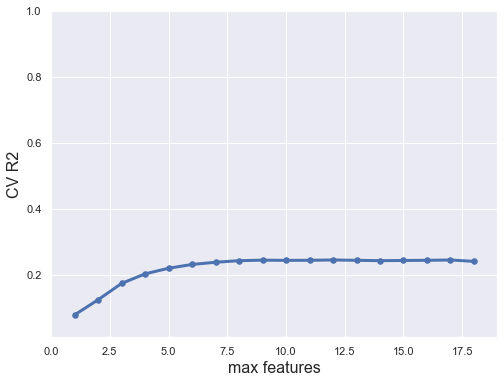

{'max_features': 12, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 88}


In [151]:
max_features = rf_cv.cv_results_['param_max_features'].data
R2_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max features', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(max_features, R2_scores, s=30)
plt.plot(max_features, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([0, 19])
plt.ylim([0.01, 1])
plt.show()
print(rf_cv.best_params_)

In [152]:
y_pred_rf_cv_train = rf_cv.predict(X_train_lin)
y_pred_rf_cv = rf_cv.predict(X_test_lin)

print('R2_random_forest =', R_squared(y_pred_rf_cv_train,y_train))
print('OSR2_random_forest =', OS_R_squared(y_pred_rf_cv, y_test,y_train))
print('MSE_random_forest =', mean_squared_error(y_pred_rf_cv, y_test,y_train))
print('MAE_random_forest =', mean_absolute_error(y_pred_rf_cv, y_test,y_train))

R2_random_forest = 0.5514066915102023
OSR2_random_forest = 0.24789128378927505
MSE_random_forest = 127.33661745342833
MAE_random_forest = 6.780617084135824


## Fourth model : Decision Tree with Cross validation

In [153]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

grid_values2 = {'ccp_alpha': np.linspace(0, 0.03, 50)}

dtc = DecisionTreeRegressor(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values2, cv=10, scoring='r2').fit(X_train_lin, y_train)

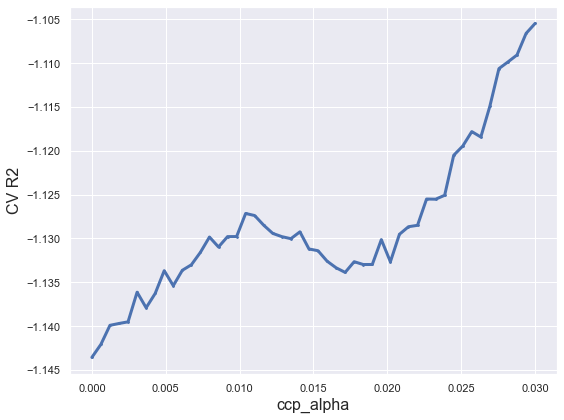

Best ccp_alpha {'ccp_alpha': 0.03}


In [154]:
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

In [155]:
y_pred_dtc_cv_train = dtc_cv.predict(X_train_lin)
y_pred_dtc_cv = dtc_cv.predict(X_test_lin)

print('R2_CART =', R_squared(y_pred_dtc_cv_train,y_train))
print('OSR2_CART =', OS_R_squared(y_pred_dtc_cv, y_test,y_train))
print('MSE_CART =', mean_squared_error(y_pred_dtc_cv, y_test,y_train))
print('MAE_CART =', mean_absolute_error(y_pred_dtc_cv, y_test,y_train))

R2_CART = 0.963059234505228
OSR2_CART = -0.6367885059090477
MSE_CART = 277.1183305509163
MAE_CART = 9.929964086068775


## Fifth model : Gradient Boosting Regressor with CV

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


grid_values3 = {'max_leaf_nodes': np.linspace(2, 10, 9, dtype='int32'),
               'min_samples_leaf': [10],
               'n_estimators': np.logspace(9, 16, num=8, base=2, dtype='int32'),
               'learning_rate': [0.01],
               'random_state': [88]}

tic = time.time()

gbr = GradientBoostingRegressor()
gbr_cv = GridSearchCV(gbr, param_grid=grid_values3, scoring='r2', cv=5)
gbr_cv.fit(X_train_lin, y_train)

toc = time.time()
print('time:', round(toc-tic, 2),'s')

In [ ]:
n_estimators = gbr_cv.cv_results_['param_n_estimators'].data
R2_scores = gbr_cv.cv_results_['mean_test_score']

plt.figure(figsize=(12, 8))
plt.xlabel('n estimators', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.grid(True, which='both')

N = len(grid_values['max_leaf_nodes'])
M = len(grid_values['n_estimators'])
for i in range(N):
    plt.scatter(n_estimators[(M*i):(M*i)+M], R2_scores[(M*i):(M*i)+M], s=30)
    plt.plot(n_estimators[(M*i):(M*i)+M], R2_scores[(M*i):(M*i)+M], linewidth=2,
             label='max leaf nodes = '+str(grid_values['max_leaf_nodes'][i]))
plt.legend(loc='lower right')
plt.show()

In [ ]:
y_pred_gbr_cv_train = gbr_cv.predict(X_train_lin)
y_pred_gbr_cv = gbr_cv.predict(X_test_lin)

print('R2_random_forest =', R_squared(y_pred_gbr_cv_train,y_train))
print('OSR2_random_forest =', OS_R_squared(y_pred_gbr_cv, y_test,y_train))
print('MSE_random_forest =', mean_squared_error(y_pred_gbr_cv, y_test,y_train))
print('MAE_random_forest =', mean_absolute_error(y_pred_gbr_cv, y_test,y_train))

In [ ]:
comparison_data = {'Baseline model': ['{:.4f}'.format(R_squared(y_pred_baseline_train,y_train)),
                                        '{:.4f}'.format(OS_R_squared(y_pred_baseline, y_test,y_train)) ,
                                      '{:.4f}'.format(mean_squared_error(y_pred_baseline, y_test,y_train)) ,
                                      '{:.4f}'.format(mean_absolute_error(y_pred_baseline, y_test,y_train))],
                    'Linear Regression': ['{:.4f}'.format(R_squared(y_pred_lin_train,y_train)),
                                        '{:.4f}'.format(OS_R_squared(y_pred_lin, y_test,y_train)) ,
                                      '{:.4f}'.format(mean_squared_error(y_pred_lin, y_test,y_train)) ,
                                      '{:.4f}'.format(mean_absolute_error(y_pred_lin, y_test,y_train))],
                   'Decision Tree Regressor': ['{:.4f}'.format(R_squared(y_pred_dtc_cv_train,y_train)),
                                        '{:.4f}'.format(OS_R_squared(y_pred_dtc_cv, y_test,y_train)) ,
                                      '{:.4f}'.format(mean_squared_error(y_pred_dtc_cv, y_test,y_train)) ,
                                      '{:.4f}'.format(mean_absolute_error(y_pred_dtc_cv, y_test,y_train))],
                   'Random Forest with CV': ['{:.4f}'.format(R_squared(y_pred_rf_cv_train,y_train)),
                                        '{:.4f}'.format(OS_R_squared(y_pred_rf_cv, y_test,y_train)) ,
                                      '{:.4f}'.format(mean_squared_error(y_pred_rf_cv, y_test,y_train)) ,
                                      '{:.4f}'.format(mean_absolute_error(y_pred_rf_cv, y_test,y_train))],
                    'Boosting model':['{:.3f}'.format(R_squared(y_pred_gbr_cv_train,y_train)),
                                        '{:.4f}'.format(OS_R_squared(y_pred_gbr_cv, y_test,y_train)) ,
                                      '{:.4f}'.format(mean_squared_error(y_pred_gbr_cv, y_test,y_train)) ,
                                      '{:.4f}'.format(mean_absolute_error(y_pred_gbr_cv, y_test,y_train))]
}

comparison_table = pd.DataFrame(data=comparison_data, index=['R2' , 'OSR2 ' , 'MSE ' , 'MAE'])
comparison_table.style.set_properties(**{'font-size': '14pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}])

